In [19]:
from os import listdir
from os.path import isfile, join

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.style
import matplotlib as mpl
mpl.style.use('default')

from api.color_scheme import *

In [20]:
res_files = [f for f in listdir('../results/') if isfile(join('../results/', f))]

In [21]:
df_summary = pd.DataFrame()

for i in res_files:
    if i.split('.')[-1] != 'txt' or i.split('_')[1] == 'symbol':
        continue
    res = pd.read_csv('../results/{}'.format(i), sep=":\t", header=None, engine='python')
    res.columns = ["info", "value"]
    res = res.set_index('info')
    
    if len(list(res.transpose().columns)) < 4:
        continue
    
    res_25 = res.transpose()[list(res.transpose().columns[:3]) + list(res.transpose().columns[4:7])]
    res_25.columns = list(res.transpose().columns[:3]) + ['C-Index', 'Brier Score', 'ROC AUC']
    res_25['Quantile'] = '25%'
    
    res_5 = res.transpose()[list(res.transpose().columns[:3]) + list(res.transpose().columns[8:11])]
    res_5.columns = list(res.transpose().columns[:3]) + ['C-Index', 'Brier Score', 'ROC AUC']
    res_5['Quantile'] = '50%'
    
    res_75 = res.transpose()[list(res.transpose().columns[:3]) + list(res.transpose().columns[12:])]
    res_75.columns = list(res.transpose().columns[:3]) + ['C-Index', 'Brier Score', 'ROC AUC']
    res_75['Quantile'] = '75%'
    
    df_summary = pd.concat([df_summary, res_25, res_5, res_75])
    
    # df_summary = pd.concat([df_summary, res.transpose()])

df_summary.reset_index(inplace=True, drop=True)
df_summary

,model,data,seed,C-Index,Brier Score,ROC AUC,Quantile
0,coxkan,rdata,7,0.7137323793703634,0.0781375574653448,0.7238218389778291,25%
1,coxkan,rdata,7,0.6467281784920162,0.1691852240471477,0.6589318060251725,50%
2,coxkan,rdata,7,0.6495543090919285,0.21373612286519528,0.6943373546884817,75%
3,dcm,linear,5,0.8093459938120132,0.11785297157479363,0.8330148112756808,25%
4,dcm,linear,5,0.7845517241379311,0.15388433183872186,0.8462262231716002,50%
...,...,...,...,...,...,...,...
1015,dcph,TRACE,1,0.7481038871249852,0.14663403423492077,0.7817375629533028,50%
1016,dcph,TRACE,1,0.7551124067186996,0.16653941509484263,0.8156522267272509,75%
1017,coxkan,FRTCS,5,0.8581818181818182,0.015199944548171003,0.8566176470588235,25%
1018,coxkan,FRTCS,5,0.855724772572317,0.03227203028759857,0.8219247449099977,50%


In [22]:
for i in df_summary.columns[3:-1]:
    df_summary[i] = df_summary[i].astype('float')
    
df_summary['model'] = df_summary['model'].str.upper()
df_summary['model'] = df_summary['model'].str.replace('COXKAN', 'CoxKAN')

df_summary

,model,data,seed,C-Index,Brier Score,ROC AUC,Quantile
0,CoxKAN,rdata,7,0.713732,0.078138,0.723822,25%
1,CoxKAN,rdata,7,0.646728,0.169185,0.658932,50%
2,CoxKAN,rdata,7,0.649554,0.213736,0.694337,75%
3,DCM,linear,5,0.809346,0.117853,0.833015,25%
4,DCM,linear,5,0.784552,0.153884,0.846226,50%
...,...,...,...,...,...,...,...
1015,DCPH,TRACE,1,0.748104,0.146634,0.781738,50%
1016,DCPH,TRACE,1,0.755112,0.166539,0.815652,75%
1017,CoxKAN,FRTCS,5,0.858182,0.015200,0.856618,25%
1018,CoxKAN,FRTCS,5,0.855725,0.032272,0.821925,50%


## Linear Experiments

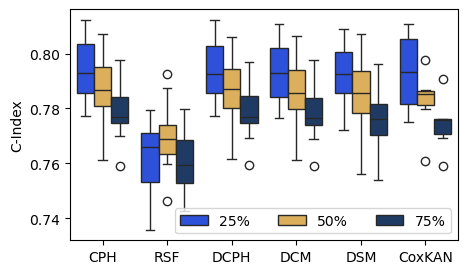

In [23]:
_ = plt.figure(figsize=(5,3))
sns.boxplot(df_summary.loc[df_summary.data=='linear'], x='model', y='C-Index', hue='Quantile', 
            order=['CPH', 'RSF', 'DCPH', 'DCM', 'DSM', 'CoxKAN'], palette=box_pal)
plt.xlabel(None)
plt.legend(loc="lower right", ncol=3)
plt.show()

## Non-Linear Experiments

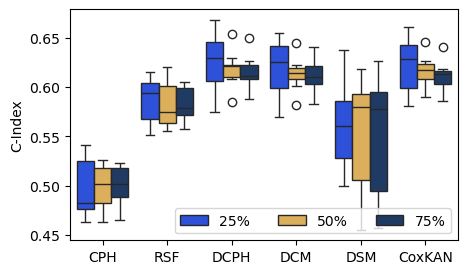

In [24]:
_ = plt.figure(figsize=(5,3))
sns.boxplot(df_summary.loc[df_summary.data=='non-linear'], x='model', y='C-Index', hue='Quantile', 
            order=['CPH', 'RSF', 'DCPH', 'DCM', 'DSM', 'CoxKAN'], palette=box_pal)
plt.xlabel(None)
plt.legend(loc="lower right", ncol=3)
plt.show()

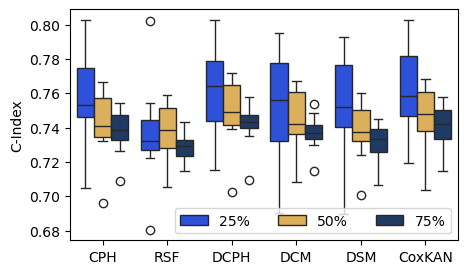

In [25]:
_ = plt.figure(figsize=(5,3))
sns.boxplot(df_summary.loc[df_summary.data=='TRACE'], x='model', y='C-Index', hue='Quantile', 
            order=['CPH', 'RSF', 'DCPH', 'DCM', 'DSM', 'CoxKAN'], palette=box_pal)
plt.xlabel(None)
plt.legend(loc="lower right", ncol=3)
plt.show()

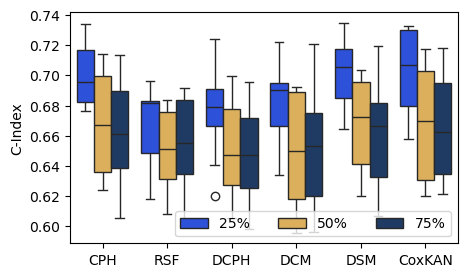

In [26]:
_ = plt.figure(figsize=(5,3))
sns.boxplot(df_summary.loc[df_summary.data=='colon'], x='model', y='C-Index', hue='Quantile', 
            order=['CPH', 'RSF', 'DCPH', 'DCM', 'DSM', 'CoxKAN'], palette=box_pal)
plt.xlabel(None)
plt.legend(loc="lower right", ncol=3)
plt.show()

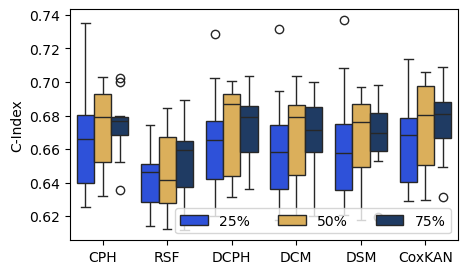

In [28]:
_ = plt.figure(figsize=(5,3))
sns.boxplot(df_summary.loc[df_summary.data=='rdata'], x='model', y='C-Index', hue='Quantile', 
            order=['CPH', 'RSF', 'DCPH', 'DCM', 'DSM', 'CoxKAN'], palette=box_pal)
plt.xlabel(None)
plt.legend(loc="lower right", ncol=3)
plt.show()

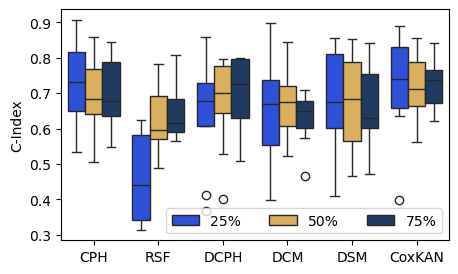

In [27]:
_ = plt.figure(figsize=(5,3))
sns.boxplot(df_summary.loc[df_summary.data=='FRTCS'], x='model', y='C-Index', hue='Quantile', 
            order=['CPH', 'RSF', 'DCPH', 'DCM', 'DSM', 'CoxKAN'], palette=box_pal)
plt.xlabel(None)
plt.legend(loc="lower right", ncol=3)
plt.show()

In [29]:
ds = 'rdata'  # 'linear', 'non-linear', 'TRACE', 'colon', 'rdata', 'FRTCS'

df_mean = df_summary.loc[df_summary.data==ds].groupby(['model', 'Quantile'])['C-Index'].mean().unstack()
df_std = df_summary.loc[df_summary.data==ds].groupby(['model', 'Quantile'])['C-Index'].std().unstack()

# print(df_mean)
# print(df_std)
print('\n' + "=========== Best: =========== ")
for q in ['25%', '50%', '75%']:
    print(q, ":", df_mean.iloc[df_mean[q].argmax()].name)
print('\n' + "======= Second Best: ======== ")
for q in ['25%', '50%', '75%']:
    print(q, ":", df_mean.loc[df_mean.index != df_mean.iloc[df_mean[q].argmax()].name].iloc[
        df_mean.loc[df_mean.index != df_mean.iloc[df_mean[q].argmax()].name][q].argmax()].name)


=========== Best: =========== 
25% : CPH
50% : CoxKAN
75% : CoxKAN

======= Second Best: ======== 
25% : CoxKAN
50% : CPH
75% : DCPH


In [30]:
# for i in ['cph', 'rsf', 'dcph', 'dcm', 'dsm', 'coxkan']:
#     for n in range(10):
#         print('python exp/test.py --data whas500 --model {} --seed {}'.format(i, n))

In [31]:
# for i in ['cph', 'rsf', 'dcph', 'dcm', 'dsm', 'coxkan']:
#     for n in range(10):
#         print('python exp/test.py --data pbc --model {} --seed {}'.format(i, n))

In [32]:
# for i in ['cph', 'rsf', 'dcph', 'dcm', 'dsm', 'coxkan']:
#     for n in range(10):
#         print('python exp/test.py --data colon --model {} --seed {}'.format(i, n))

In [33]:
# for i in ['cph', 'rsf', 'dcph', 'dcm', 'dsm', 'coxkan']:
#     for n in range(10):
#         print('python exp/test.py --data FRTCS --model {} --seed {}'.format(i, n))

In [34]:
# for i in ['cph', 'rsf', 'dcph', 'dcm', 'dsm', 'coxkan']:
#     for n in range(10):
#         print('python exp/test.py --data linear --model {} --seed {}'.format(i, n))

In [35]:
# for i in ['cph', 'rsf', 'dcph', 'dcm', 'dsm', 'coxkan']:
#     for n in range(10):
#         print('python exp/test.py --data non-linear --model {} --seed {}'.format(i, n))

In [36]:
for i in ['cph', 'rsf', 'dcph', 'dcm', 'dsm', 'coxkan']:
    for n in range(10):
        print('python exp/test.py --data TRACE --model {} --seed {}'.format(i, n))

python exp/test.py --data TRACE --model cph --seed 0
python exp/test.py --data TRACE --model cph --seed 1
python exp/test.py --data TRACE --model cph --seed 2
python exp/test.py --data TRACE --model cph --seed 3
python exp/test.py --data TRACE --model cph --seed 4
python exp/test.py --data TRACE --model cph --seed 5
python exp/test.py --data TRACE --model cph --seed 6
python exp/test.py --data TRACE --model cph --seed 7
python exp/test.py --data TRACE --model cph --seed 8
python exp/test.py --data TRACE --model cph --seed 9
python exp/test.py --data TRACE --model rsf --seed 0
python exp/test.py --data TRACE --model rsf --seed 1
python exp/test.py --data TRACE --model rsf --seed 2
python exp/test.py --data TRACE --model rsf --seed 3
python exp/test.py --data TRACE --model rsf --seed 4
python exp/test.py --data TRACE --model rsf --seed 5
python exp/test.py --data TRACE --model rsf --seed 6
python exp/test.py --data TRACE --model rsf --seed 7
python exp/test.py --data TRACE --model rsf --